<a href="https://colab.research.google.com/github/Manisha-Karim/Customer-Segmentation/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [36]:
df = pd.read_csv("/content/gdrive/MyDrive/Credit Card Customer Data.csv")

In [37]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#  EDA AND PRE-PROCESSING


In [39]:
df.drop(['Sl_No', 'Customer Key'], axis = 1, inplace = True)

In [40]:
df.isnull().sum() * 100 / len(df)

Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made       0.0
dtype: float64

In [41]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [42]:
def eda_plot(df, feature):
    plt.figure(figsize = (8, 3))

    #histogram    
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins = 30)
    plt.title('Histogram')

  
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y = df[feature])
    plt.title('Boxplot')

    plt.show()

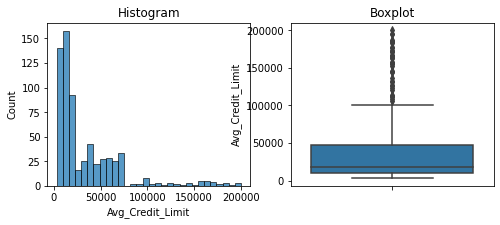

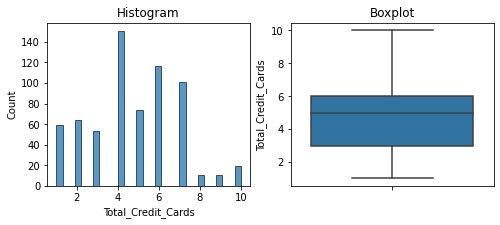

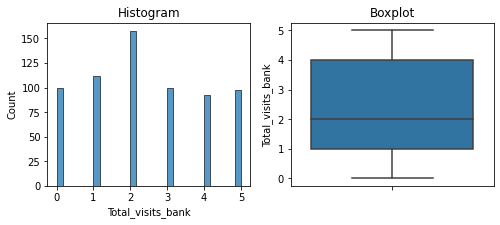

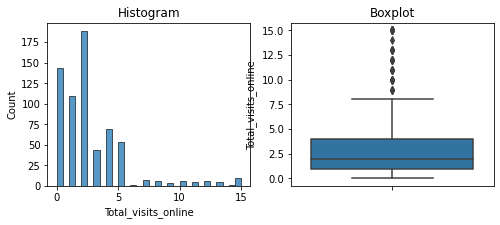

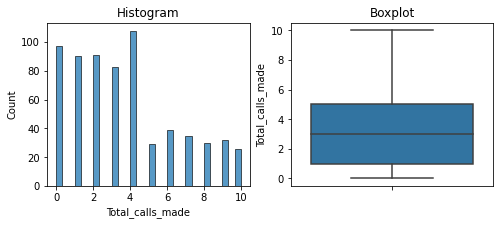

In [43]:
for col in df:
  feature = col
  eda_plot(df, feature) 



1.   Avg Cred Limit has outliers

1.   Total visits online has outliers
2.   List item


4.   List item



> Indented block



In [44]:
def iqr_capping(df, features):
    
    for col in features:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        ub = q3 + (1.5*iqr)
        lb = q1 - (1.5*iqr)

        df[col] = np.where(df[col]>ub, ub,
                        np.where(df[col]<lb, lb, df[col]))

In [45]:
out_features = ['Avg_Credit_Limit', 'Total_visits_online']
iqr_capping(df, out_features)

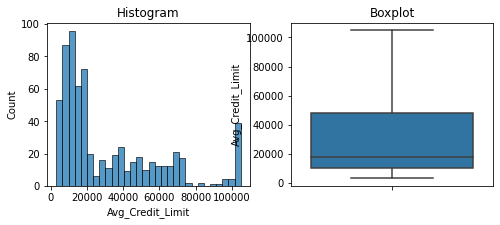

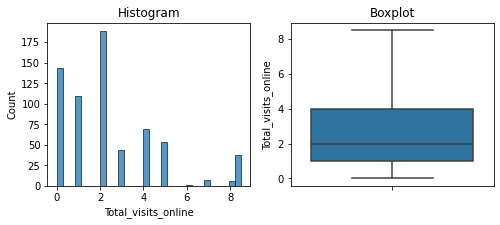

In [46]:
for col in df[out_features]:
  feature = col
  eda_plot(df, feature) 

No more outliers!

In [47]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,31666.666667,4.706061,2.403030,2.397727,3.583333
std,28506.386332,2.167835,1.631813,2.256956,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,105000.000000,10.000000,5.000000,8.500000,10.000000




> Outcomes

*   Avg_Credit_Limit is skewed
*   Average of 5 credit cards
*   Visits bank twice a both online and in person
*   Made 2 calls to the bank





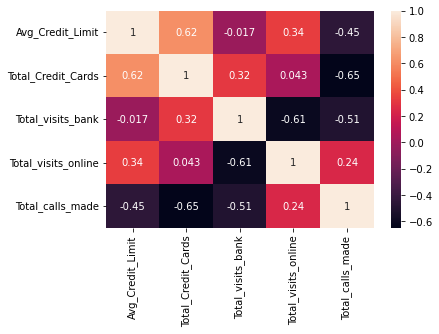

In [48]:
sns.heatmap(df.corr(), annot = True)

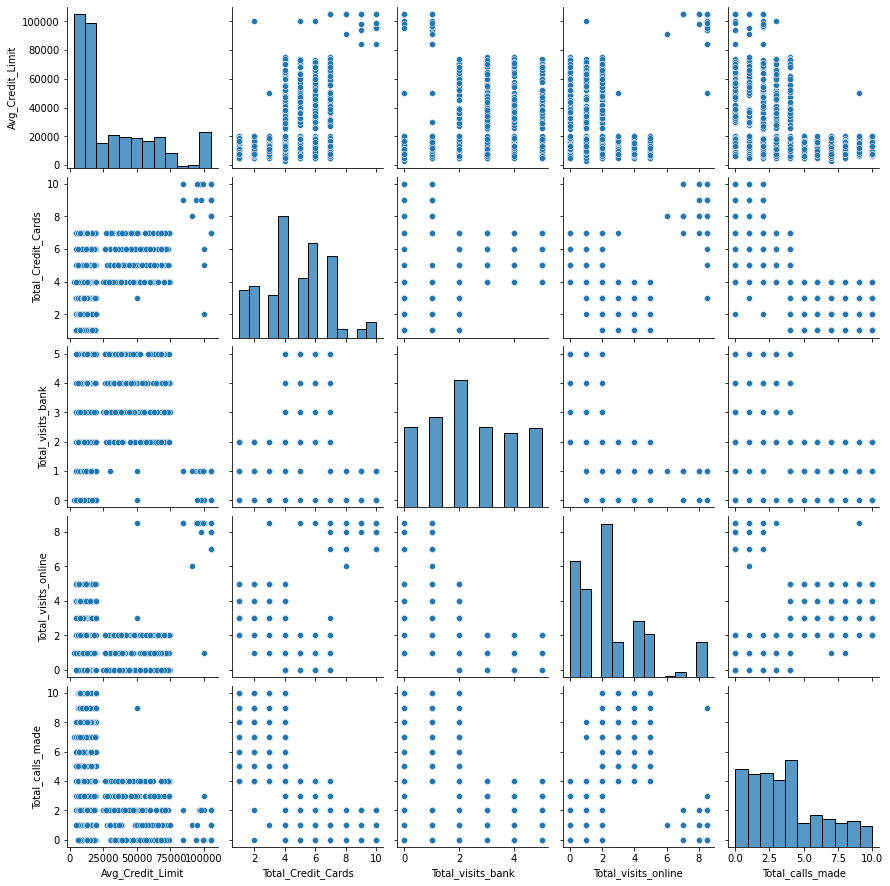

In [49]:
sns.pairplot(df)





> Outcomes

1.   Average Credit Limit is proportional to the number of credit cards
2.   Customers with higher credit limit?/no. of credit cards makes lesser calls
3.   Customers who makes calls to the bank prefer visiting the bank in person rather than online.


Loyal Customers:
Customers with a credit limit higher than around 60k




In [50]:
scaler = StandardScaler()
standardData = scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df .columns )

In [51]:
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


# K MEANS

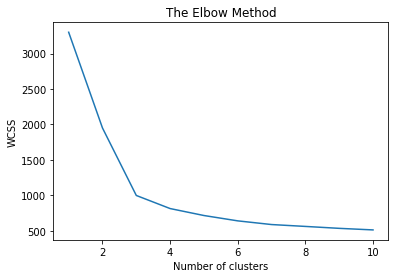

In [52]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
    kmeans.fit(scaled_df) 
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

In [53]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df)

In [54]:
y_kmeans

array([2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [55]:
X = scaled_df
Y = y_kmeans

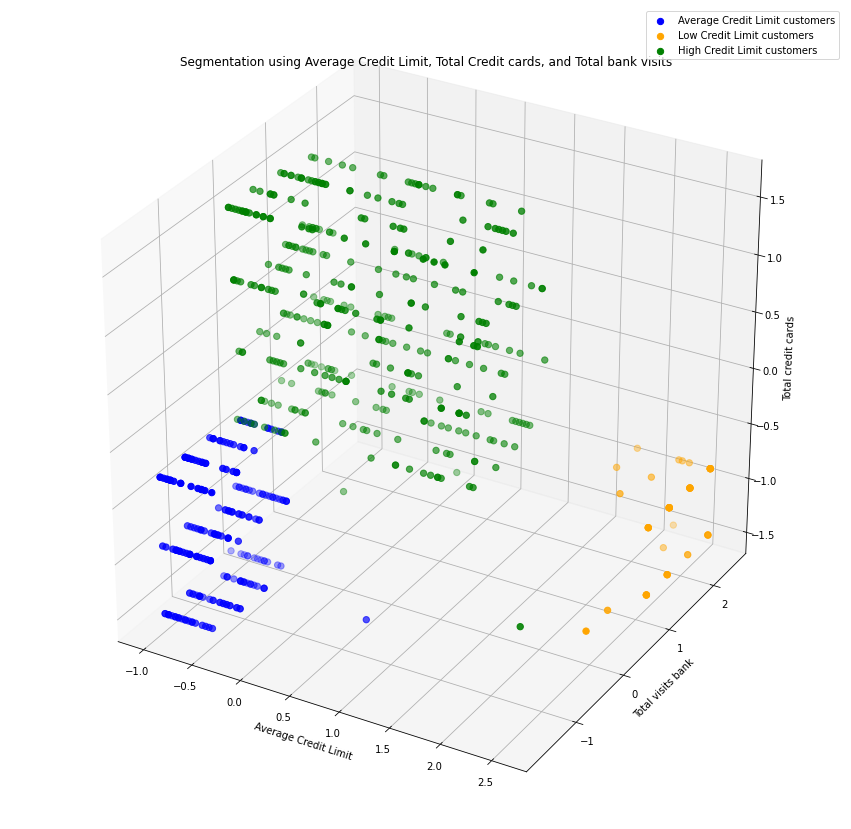

In [57]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], X.values[y_kmeans == 0, 2], s = 40 , color = 'blue', 
           label = "Average Credit Limit customers")
ax.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], X.values[y_kmeans == 1, 2], s = 40 , color = 'orange', 
           label = "Low Credit Limit customers")
ax.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], X.values[y_kmeans == 2, 2], s = 40 , color = 'green', 
           label = "High Credit Limit customers")
plt.title('Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total visits bank')
ax.set_zlabel('Total credit cards')
ax.legend()
plt.show()

# PCA

In [ ]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(scaled_df)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
principal_df.head()